<a href="https://colab.research.google.com/github/Gloria-L19/Predicting_Actual_Productivity/blob/main/Copy_of_Worker_productivity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
# importing useful libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
#loading data
filename='/content/garments_worker_productivity.csv'
df=pd.read_csv(filename)
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [29]:
# cleaning the data
# starting by fing duplicates
df.duplicated().sum()

0

No duplicates

In [30]:
# checking out the number of rows nd columns
df.shape

(1197, 15)

In [31]:
# finding the data type and missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

The wip column has missing data. The date column datatype will be changed later to datetime datatype



In [32]:
# coverting the date column to datetime object datatype
df['date']=pd.to_datetime(df['date'])

In [33]:
# Finding the unique data in the columns
df.nunique()

date                      59
quarter                    5
department                 3
day                        6
team                      12
targeted_productivity      9
smv                       70
wip                      548
over_time                143
incentive                 48
idle_time                 12
idle_men                  10
no_of_style_change         3
no_of_workers             61
actual_productivity      879
dtype: int64

It does not indicate any inconsistencies in the data

In [34]:
# checking for inconsistenciesin the categorical values
df['day'].value_counts()

Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: day, dtype: int64

No inconsistency

In [35]:
# inconsistency in the quarter column
df['quarter'].value_counts()

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64

In [36]:
# looking for inconsistency in the department column
df['department'].value_counts()

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64

In [37]:
# correting the inconsistency in the department column
df['department'] = df['department'].str.strip()
vc = df['department'].value_counts()
vc

sweing       691
finishing    506
Name: department, dtype: int64

In [38]:
# handling the missing data in wip column
num_missing = df['wip'].isna().sum()

total_rows = df.shape[0]

percent_missing = num_missing / total_rows
print(f'{percent_missing:.2f}% of the data in the wip column is missing')

0.42% of the data in the wip column is missing


In [39]:
# since wip column has 58% of its data, i will replace the missing data
# i will use mean because the data is float datatype
mean_wip=df['wip'].mean()
df['wip'].fillna(mean_wip,inplace=True)
df.isna().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

All missing data cleared

Exploring Data 

In [40]:
# grouping by the quarter
quarter_sum= df.groupby('quarter')['actual_productivity'].sum()
quarter_sum

quarter
Quarter1    270.561521
Quarter2    249.142761
Quarter3    147.999310
Quarter4    175.848647
Quarter5     36.351805
Name: actual_productivity, dtype: float64

In [41]:
quarter_sum_target= df.groupby('quarter')['targeted_productivity'].sum()
quarter_sum_target

quarter
Quarter1    267.87
Quarter2    245.25
Quarter3    151.45
Quarter4    177.20
Quarter5     31.60
Name: targeted_productivity, dtype: float64

Text(0, 0.5, 'actual_productivity')

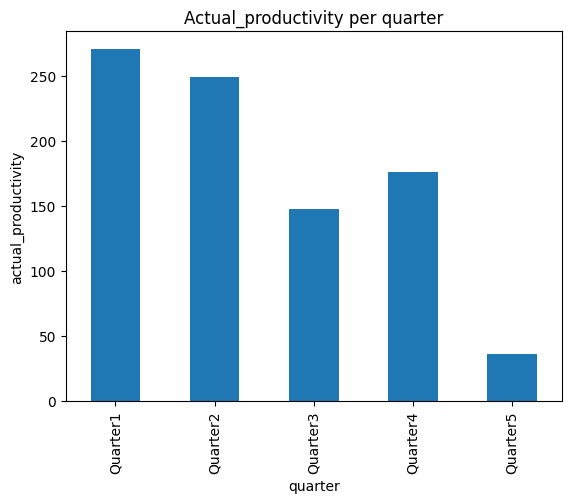

In [42]:
# plotting a bar graph showing the actual_productivity per quarter
quarter_sum.plot(kind='bar')
plt.title('Actual_productivity per quarter')
plt.xlabel('quarter')
plt.ylabel('actual_productivity')

Quarter 1 had the higest productivity  followed by Quarter 2. Quarter 5 had the least productivity

Text(0, 0.5, 'targeted_productivity')

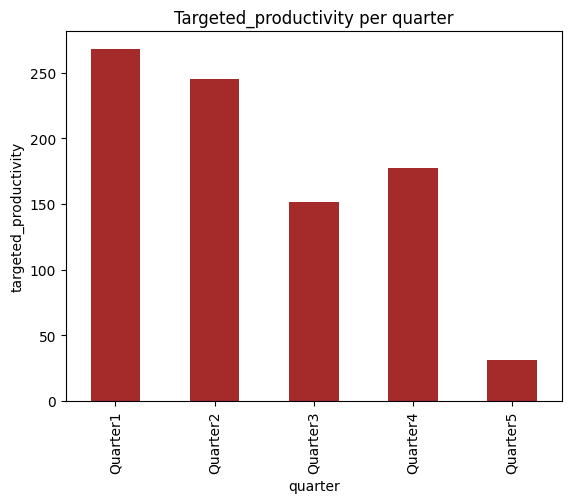

In [43]:
# plotting a bar graph showing the targeted_productivity per quarter
quarter_sum_target.plot(kind='bar', color= 'brown')
plt.title('Targeted_productivity per quarter')
plt.xlabel('quarter')
plt.ylabel('targeted_productivity')

Text(0.5, 0, 'actual_productivity')

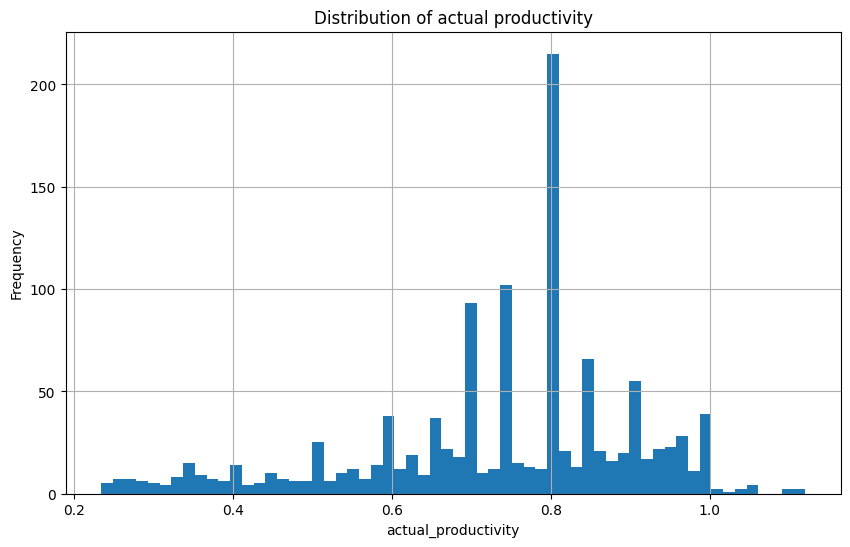

In [44]:
# Looking at a histogram of the actual productivity
fig, ax = plt.subplots(figsize=(10,6))
df['actual_productivity'].hist(bins=60,ax=ax)
plt.ticklabel_format(useOffset= False,style='plain')
plt.title('Distribution of actual productivity')
plt.ylabel('Frequency')
plt.xlabel('actual_productivity')

The highest occuring productivity is 0.8

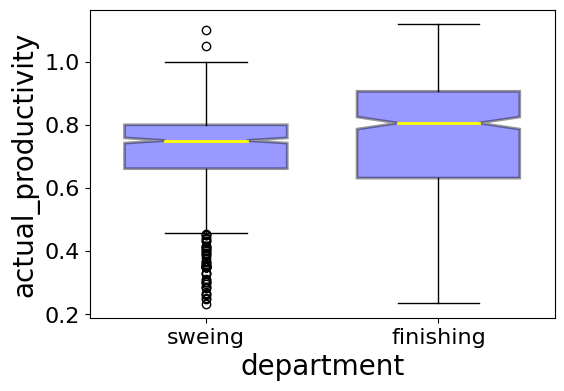

In [45]:
# using box plots
sweing = df.loc[df['department']=='sweing','actual_productivity'].values
finishing = df.loc[df['department']=='finishing','actual_productivity'].values
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(6,4))
axes.boxplot([sweing,finishing], 
             notch = True, 
             labels=['sweing', 'finishing'],
             widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
             );
plt.xlabel('department', fontsize = 20);
plt.ylabel('actual_productivity', fontsize = 20);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);            

 

1.   The median for the finishing department is higher than that of sweing 
2.   The interquartile range for the finishing department is higher than that of sweing
3.   The sweing department has plenty of outliers

In conclusion, the finishing department achieves better actual productivity than the sweing department





<ipython-input-46-ec01d2188c7a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr= df.corr()


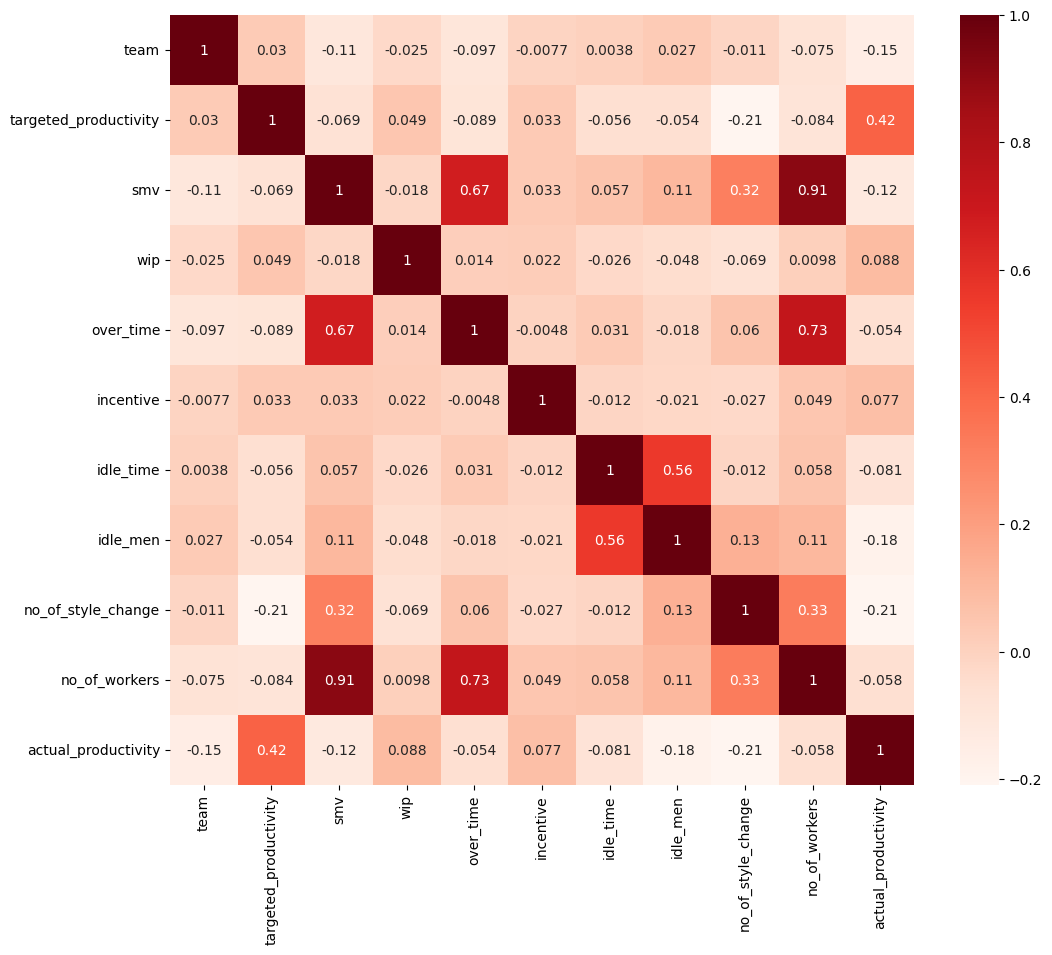

In [46]:
# seeing the correlation of data using heatmaps
corr= df.corr()
plt.figure(figsize=(12, 10)) 
sns.heatmap(corr, cmap = 'Reds', annot =True);



1.   High correlation between  smv and no_of_workers, overtime and number of workers
2.   Low correlation between targeted_productivity and actual_productivity





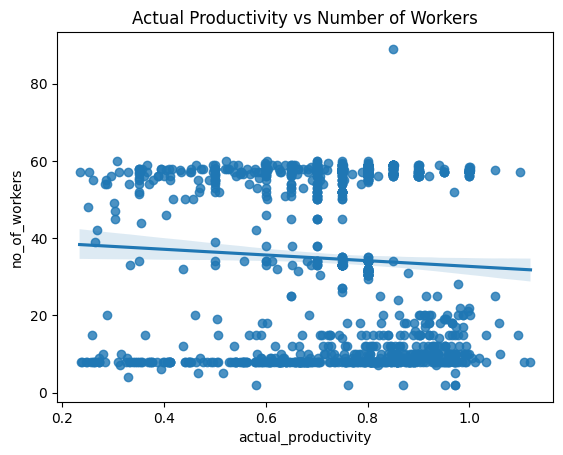

In [47]:
#scatterplot for actual productivity and no_of_workers
sns.regplot(data=df, x='actual_productivity', y='no_of_workers')
plt.title('Actual Productivity vs Number of Workers')
plt.show()

In [48]:
# Plotting a  bar graph for actual productivity for each day 
day_sum= df.groupby('day')['actual_productivity'].sum()
day_sum

day
Monday       146.362211
Saturday     140.610697
Sunday       147.906638
Thursday     143.805535
Tuesday      149.282884
Wednesday    151.936077
Name: actual_productivity, dtype: float64

In [49]:
# filtering day_count for targeted productivity
day_sum_target= df.groupby('day')['targeted_productivity'].sum()
day_sum_target

day
Monday       145.15
Saturday     137.20
Sunday       149.70
Thursday     143.42
Tuesday      146.25
Wednesday    151.65
Name: targeted_productivity, dtype: float64

Text(0, 0.5, 'Actual productivity')

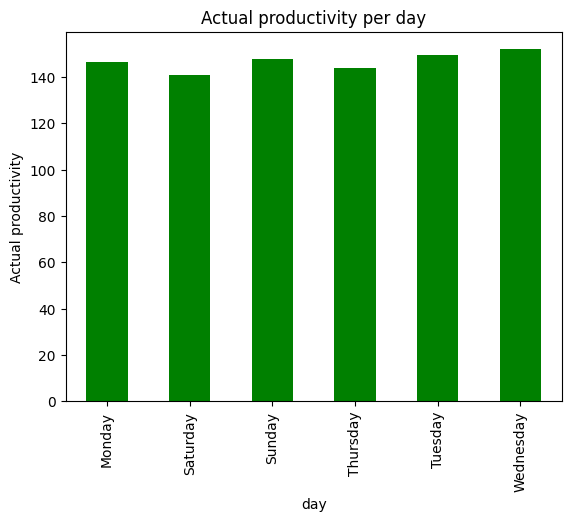

In [50]:
# bar graph
day_sum.plot(kind='bar', color ='green',label= 'actual_productivity')
plt.title('Actual productivity per day')
plt.xlabel('day')
plt.ylabel('Actual productivity')

The highest actual_productivity was seen on wednesday

Text(0, 0.5, 'targeted_productivity')

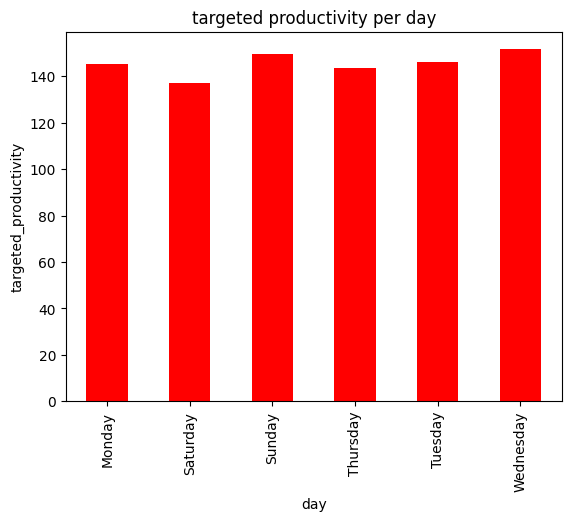

In [51]:
#Looking at the targeted productivity
day_sum_target.plot(kind='bar', color ='red')
plt.title('targeted productivity per day')
plt.xlabel('day')
plt.ylabel('targeted_productivity')

Comparing both Bar plots, the targeted productivity is almost accurate to to the actual productivity

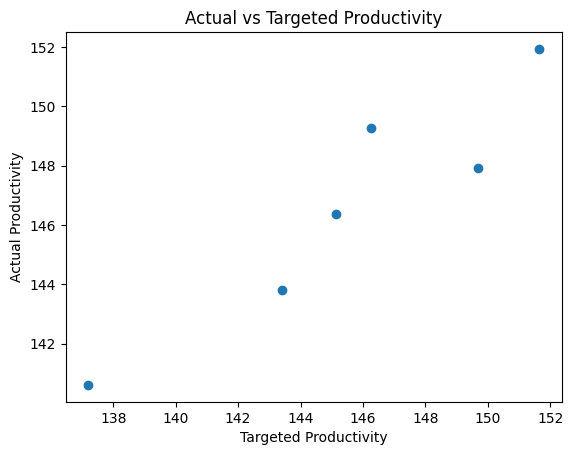

In [52]:
# creating scatter plot
plt.scatter(day_sum_target, day_sum)

# setting axis labels
plt.xlabel('Targeted Productivity')
plt.ylabel('Actual Productivity')

# setting plot title
plt.title('Actual vs Targeted Productivity')

# displaying the plot
plt.show()

Using different models to analyse my data.
Starting with the linear regession model


In [53]:
#imports
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [54]:
#Setting the target at y
y=df['actual_productivity']

# setting features matrix as X
X=df.drop(columns=['date','actual_productivity'])

# train_test_split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [55]:
# ordinal encoding the data
df['quarter']= df['quarter'].replace({'Quarter1':0,'Quarter2':1,'Quarter3':2,'Quarter4':3,'Quarter5':4})

In [56]:
# Selector for object data type as cat_selector 
# selector for numerical data as num-selector
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')


In [57]:
# Instantiating Standard Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [58]:
# Numeric  and categoorical pipeline
numeric_pipe = make_pipeline(scaler)
categorical_pipe = make_pipeline(ohe)

In [59]:
# Tuples for Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff7f66f3be0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff7f4500df0>)])

In [60]:
#instantiate the linear regression model
lin_reg= LinearRegression()

#create pipeline
lin_reg_pipe= make_pipeline(preprocessor,lin_reg)

# Fit pipeline
lin_reg_pipe.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff7f66f3be0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff7f4500df0>)])),
                ('linearregression', LinearRegression())])

In [61]:
#create model predictions
train_pred= lin_reg_pipe.predict(X_train)
test_pred = lin_reg_pipe.predict(X_test)

In [62]:
#evaluating using  MAE (Mean Absolute Error) 
train_MAE = np.mean(np.abs(train_pred-y_train))
test_MAE = np.mean(np.abs(test_pred-y_test))
print(f'Model training MAE :{train_MAE}')
print(f'Model testing MAE : {test_MAE}')

Model training MAE :0.10552340986598385
Model testing MAE : 0.1121608490652289


In [63]:
# evaluating using root mean squared error (RMSE )

train_RMSE = np.sqrt(np.mean(np.abs(train_pred-y_train)**2))
test_RMSE = np.sqrt(np.mean(np.abs(train_pred-y_train)**2))

print(f'Model training RMSE:{train_RMSE}')
print(f'Model testing RMSE :{test_RMSE}')

Model training RMSE:0.14473255788974684
Model testing RMSE :0.14473255788974684


In [64]:
# evaluating using r2 score
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)
print(f'Model training R2:{train_r2}')
print(f'Model testing R2 :{test_r2}')

Model training R2:0.3280046211392734
Model testing R2 :0.1666761392385686


The Linear model in this case is providing very low results with MAE and RMSE being showing that the difference between our predicted and actual values is low.
The r2 score however is very low. Only 16% of our target variation can be expained

Using the random Forest Model

In [65]:
# import library
from sklearn.ensemble import RandomForestRegressor

In [66]:
#instantiating the model
rf= RandomForestRegressor(random_state=42)

# creating pipeline for processed data
rf_pipe= make_pipeline( preprocessor,rf)

In [67]:
# fitting the model
rf_pipe.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff7f66f3be0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff7f4500df0>)])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [68]:
# Evaluating the  Random Forest model(RF) performance
#create model predictions
rf_train_pred= rf_pipe.predict(X_train)
rf_test_pred = rf_pipe.predict(X_test)

In [69]:
# evaluating using root mean squared error (RMSE )
train_RMSE = np.sqrt(np.mean(np.abs(rf_train_pred-y_train)**2))
test_RMSE = np.sqrt(np.mean(np.abs(rf_train_pred-y_train)**2))

print(f'Model training (RF) RMSE:{train_RMSE}')
print(f'Model testing (RF)RMSE :{test_RMSE}')

Model training (RF) RMSE:0.045653049339849885
Model testing (RF)RMSE :0.045653049339849885


In [70]:
# finding the r2 score
rf_train_score = rf_pipe.score(X_train, y_train)
rf_test_score = rf_pipe.score(X_test, y_test)
print(rf_train_score)
print(rf_test_score)


0.9331389190738243
0.42844554023177817


In [71]:
#evaluating using  MAE (Mean Absolute Error) 
train_MAE = np.mean(np.abs(rf_train_pred-y_train))
test_MAE = np.mean(np.abs(rf_test_pred-y_test))
print(f'Model training (rf) MAE :{train_MAE}')
print(f'Model testing (rf)MAE : {test_MAE}')

Model training (rf) MAE :0.028507272563032343
Model testing (rf)MAE : 0.07841864639959996


For the first Random forest model. Our model was only 7% off on its predictions using MAE
The RMSE shows that we were off by only 4% which is good.
The R2 score is 0.4346669276463696 meaning that 43.4% of our variation in the target. 

The above values are better than that of the Linear regression model. 

I will be improving on the The random Forest Model further to achieve better results

In [72]:
# looking at the parameters for hypertuning
rf_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7ff7f66f3be0>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse=False))]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7ff7f4500df0>)])),
  ('randomforestregressor', RandomForestRegressor(random_state=42))],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('pipeline-1',
                                  Pipeline(steps=[('s

In [73]:
#getting the maximum depth
est_depths=[estimator.get_depth() for estimator in rf.estimators_]
max(est_depths)

31

In [74]:
# using a loop to find the best depth at which THE r2 score was best
depths= range(1,max(est_depths))
# changing to dataframe
scores= pd.DataFrame(index=depths, columns=['Test Score'])
#creating loop
for depth in depths:
  rf_1= RandomForestRegressor(max_depth=depth,random_state=42)
  rf1_pipe= make_pipeline(preprocessor,rf_1)
  rf1_pipe.fit(X_train,y_train)
  scores.loc[depth, 'Train Score'] = rf1_pipe.score(X_train, y_train)
  scores.loc[depth, 'Test Score']= rf1_pipe.score(X_test,y_test)
  
  # sorting scores
sorted_scores= scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` 

,Test Score,Train Score
6,0.461571,0.677275
7,0.459952,0.737740
5,0.453195,0.609284
8,0.451232,0.790537
9,0.439821,0.836072


The highest R2 score was at 0.458943 with a depth of 7 on the target with a low r2 score on the train data set

In [75]:
# evaluating the tuned Random forest model
#create model predictions
rf1_train_pred= rf1_pipe.predict(X_train)
rf1_test_pred = rf1_pipe.predict(X_test)

In [76]:
# evaluating RMSE
train_RMSE = np.sqrt(np.mean(np.abs(rf1_train_pred-y_train)**2))
test_RMSE = np.sqrt(np.mean(np.abs(rf1_train_pred-y_train)**2))

print(f'Model training (RF1) RMSE:{train_RMSE}')
print(f'Model testing (RF1)RMSE :{test_RMSE}')

Model training (RF1) RMSE:0.04565635061177059
Model testing (RF1)RMSE :0.04565635061177059


In [77]:
#evaluating using  MAE (Mean Absolute Error) 
train_MAE = np.mean(np.abs(rf1_train_pred-y_train))
test_MAE = np.mean(np.abs(rf1_test_pred-y_test))
print(f'Model training (rf1) MAE :{train_MAE}')
print(f'Model testing (rf1)MAE : {test_MAE}')

Model training (rf1) MAE :0.028508078897892992
Model testing (rf1)MAE : 0.07841398981656662


I will take the Random Forest model for this project. The R2 score explain 46.25% of the variation in the actual_productivity. The MAE shows 7% difference between the predicted and actual values. The RMSE shows that the prediction  made on average differ by 4.6% from the actual values